<h1>Imports<h1>

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

from catboost import CatBoostClassifier
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay

<h1>Read CSV<h1>

In [2]:
base = pd.read_csv("heart.csv")

<h1>Exploratory Analysis<h1>

In [3]:
display(base)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
base.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [6]:
base.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [7]:
print("ChestPainType:")
print(base["ChestPainType"].value_counts())
print("RestingECG:")
print(base["RestingECG"].value_counts())
print("ST_Slope:")
print(base["ST_Slope"].value_counts())
print("Sex:")
print(base["Sex"].value_counts())
print("FastingBS:")
print(base["FastingBS"].value_counts())
print("ExerciseAngina:")
print(base["ExerciseAngina"].value_counts())

ChestPainType:
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
RestingECG:
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
ST_Slope:
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64
Sex:
M    725
F    193
Name: Sex, dtype: int64
FastingBS:
0    704
1    214
Name: FastingBS, dtype: int64
ExerciseAngina:
N    547
Y    371
Name: ExerciseAngina, dtype: int64


array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'RestingBP'}>,
        <AxesSubplot: title={'center': 'Cholesterol'}>],
       [<AxesSubplot: title={'center': 'FastingBS'}>,
        <AxesSubplot: title={'center': 'MaxHR'}>,
        <AxesSubplot: title={'center': 'Oldpeak'}>],
       [<AxesSubplot: title={'center': 'HeartDisease'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

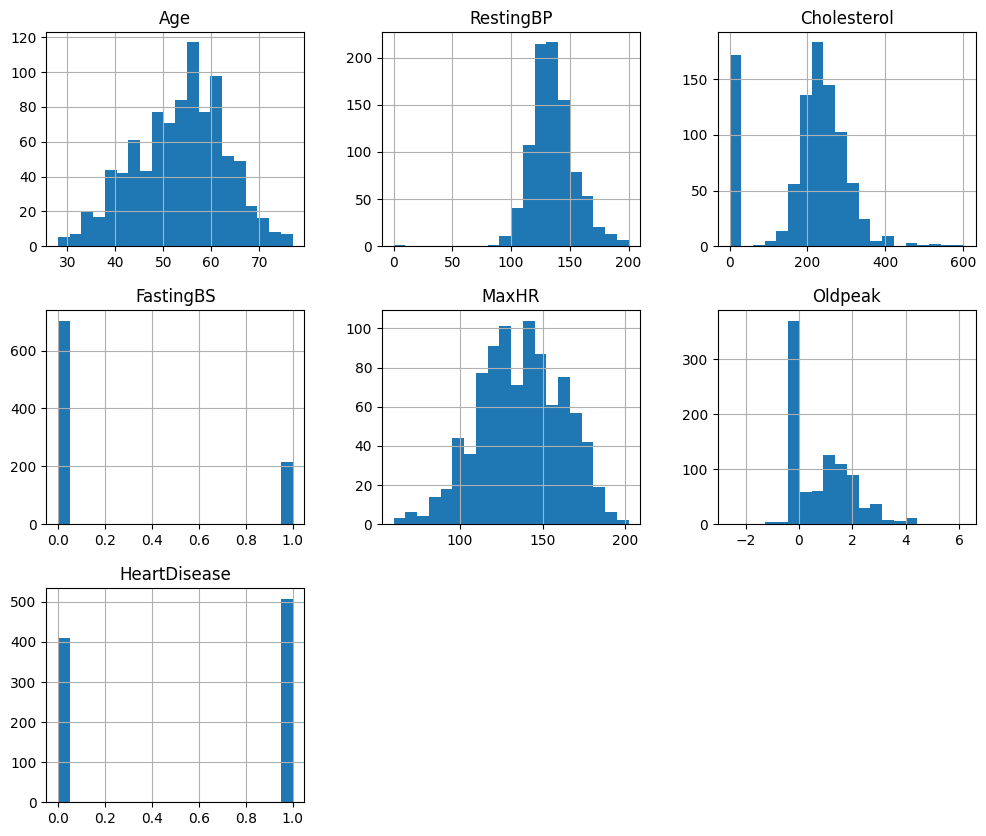

In [8]:
base.hist(figsize=(12,10), bins=20)

<AxesSubplot: >

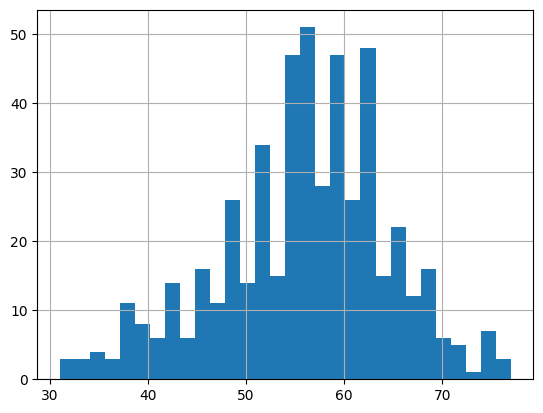

In [9]:
base[base["HeartDisease"] == 1]["Age"].hist(bins=30)

<AxesSubplot: >

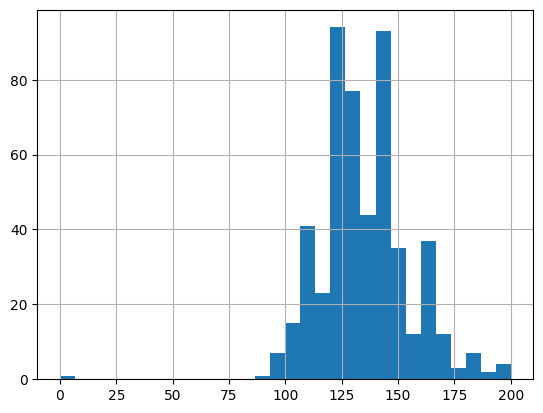

In [10]:
base[base["HeartDisease"] == 1]["RestingBP"].hist(bins=30)

<AxesSubplot: >

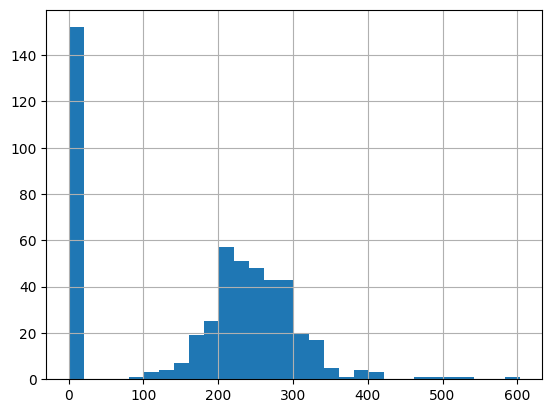

In [11]:
base[base["HeartDisease"] == 1]["Cholesterol"].hist(bins=30)

<AxesSubplot: >

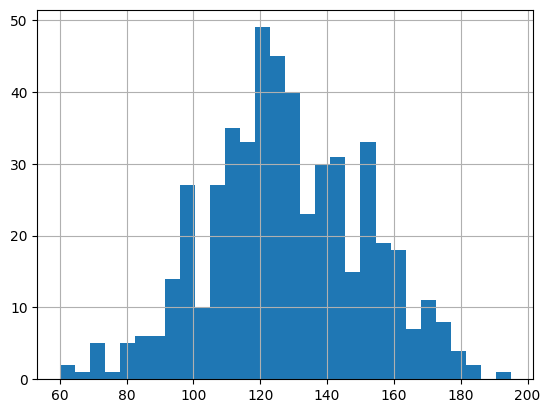

In [12]:
base[base["HeartDisease"] == 1]["MaxHR"].hist(bins=30)

<AxesSubplot: >

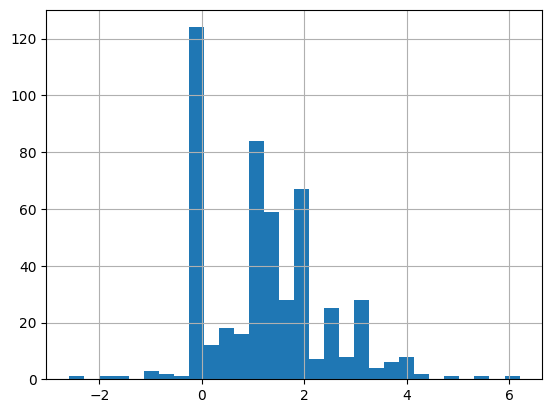

In [13]:
base[base["HeartDisease"] == 1]["Oldpeak"].hist(bins=30)

<AxesSubplot: >

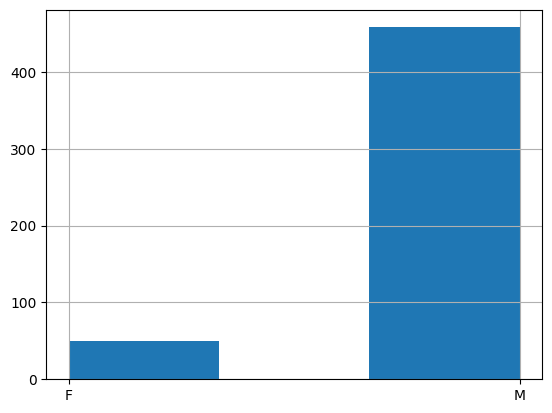

In [14]:
base[base["HeartDisease"] == 1]["Sex"].hist(bins=3)

<AxesSubplot: >

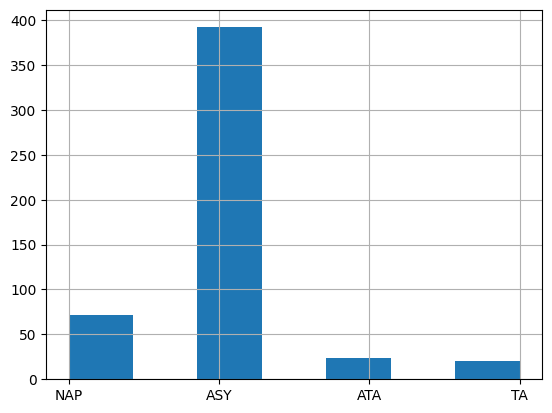

In [15]:
base[base["HeartDisease"] == 1]["ChestPainType"].hist(bins=7)

<AxesSubplot: >

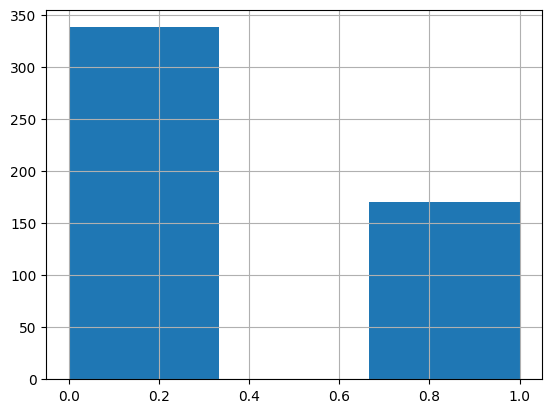

In [16]:
base[base["HeartDisease"] == 1]["FastingBS"].hist(bins=3)

<AxesSubplot: >

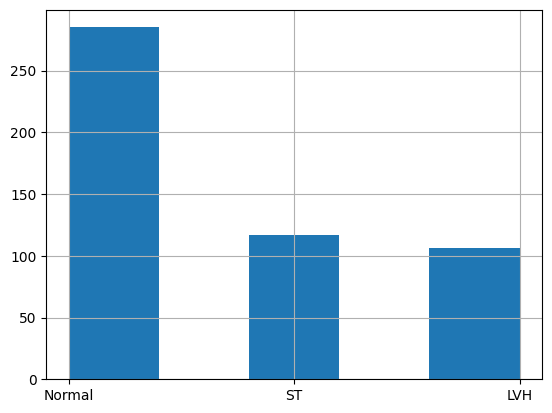

In [17]:
base[base["HeartDisease"] == 1]["RestingECG"].hist(bins=5)

<AxesSubplot: >

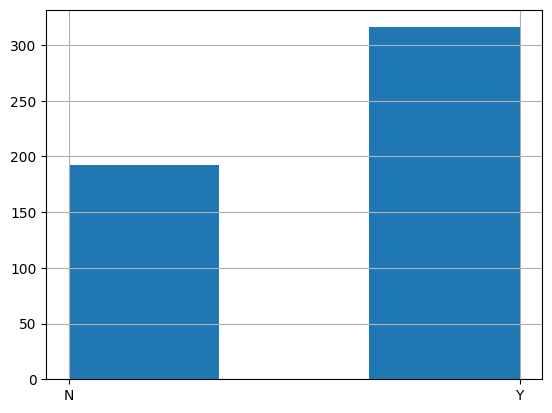

In [18]:
base[base["HeartDisease"] == 1]["ExerciseAngina"].hist(bins=3)

<AxesSubplot: >

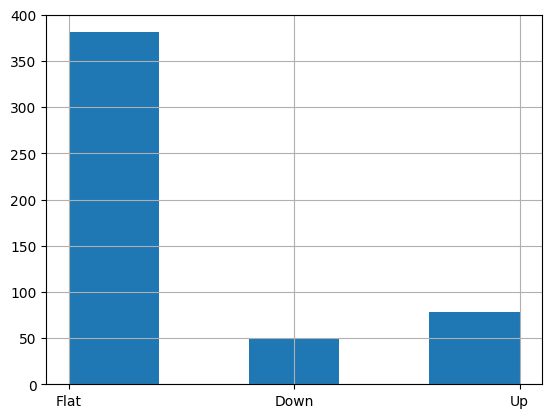

In [19]:
base[base["HeartDisease"] == 1]["ST_Slope"].hist(bins=5)

In [20]:
corr_matrix = base.corr()
corr_matrix["HeartDisease"].sort_values(ascending=False)

C:\Users\lopes\AppData\Local\Temp\ipykernel_11188\2009729677.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = base.corr()


HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64

<h1>Treating Data<h1>

In [21]:
def trat_sex(valor):
    if valor == "M":
        return 0
    else:
        return 1

def trat_pain(valor):
    if valor == "ASY":
        return 0
    elif valor == "NAP":
        return 1
    elif valor == "ATA":
        return 2
    else:
        return 3

def trat_ecg(valor):
    if valor == "Normal":
        return 0
    elif valor == "LVH":
        return 1
    else:
        return 2

def trat_exercise(valor):
    if valor == "N":
        return 0
    else:
        return 1

def trat_st(valor):
    if valor == "Flat":
        return 0
    elif valor == "Up":
        return 1
    else:
        return 2

def trat_age(valor):
    if valor < 30:
        return 0
    elif valor < 40:
        return 1
    elif valor < 50:
        return 2
    elif valor < 60:
        return 3
    elif valor < 70:
        return 4
    else:
        return 5

In [22]:
base["Sex_Num"] = base["Sex"].map(trat_sex)
base["Pain_Num"] = base["ChestPainType"].map(trat_pain)
base["Ecg_Num"] = base["RestingECG"].map(trat_ecg)
base["Exercise_Num"] = base["ExerciseAngina"].map(trat_exercise)
base["St_Num"] = base["ST_Slope"].map(trat_st)
base["Age_Num"] = base["Age"].map(trat_age)

In [23]:
display(base)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  Sex_Num  Pain_Num  \
0      172              N      0.0       Up             0        0         2   
1      156              N      1.0     Flat             1        1         1   
2       98              N      0.0       Up             0        0         2   
3      108              Y      1.5     Flat             1        1         0   
4      122              N      0.0       Up             0        0         1   
..     ...            ...      ...      ...           ...      ...       ...   
913    132              N      1.2     Flat             1        0         3   
914    141              N      3.4     Flat             1        0         0   
915    115              Y      1.2     Flat             1        0         0   
916    174              N      0.0     Flat             1        1         2   
917    173              N      0.0       Up             0        0         1   

     Ecg_Num  Exercise_Num  St_Num  Age_Num  
0          0             0       1        2  
1          0             0       0        2  
2          2             0       1        1  
3          0             1       0        2  
4          0             0       1        3  
..       ...           ...     ...      ...  
913        0             0       0        2  
914        0             0       0        4  
915        0             1       0        3  
916        1             0       0        3  
917        0             0       1        1  

[918 rows x 18 columns]

In [24]:
corr_matrix = base.corr()
corr_matrix["HeartDisease"].sort_values(ascending=False)

C:\Users\lopes\AppData\Local\Temp\ipykernel_11188\2009729677.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = base.corr()


HeartDisease    1.000000
Exercise_Num    0.494282
Oldpeak         0.403951
Age             0.282039
Age_Num         0.268144
FastingBS       0.267291
Ecg_Num         0.107628
RestingBP       0.107589
Cholesterol    -0.232741
Sex_Num        -0.305445
St_Num         -0.397802
MaxHR          -0.400421
Pain_Num       -0.471354
Name: HeartDisease, dtype: float64

<h1>Features<h1>

In [25]:
vars = ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", 
        "Oldpeak", "Sex_Num", "Pain_Num", 
        "Ecg_Num", "Exercise_Num", "St_Num", "Age_Num"]

<h1>Subgroups Vars<h1>

<p>Aqui eu separo todos os subgrupos possíveis das features<p>

In [26]:
num_variaveis = len(vars)
all_subgrupos = []

while (num_variaveis > 0):
    subgrupos = list(combinations(vars, num_variaveis))

    for subgrupo in subgrupos:
        all_subgrupos.append(list(subgrupo))

    num_variaveis = num_variaveis - 1

<h1>CatBoost Testing all Subgroups<h1>

<p>Aqui para cada subgrupo das features, eu treino o modelo e verifico sua acurácia. Depois de testar todos subgrupos, eu verifico aquele que teve a melhor acurácia e vejo junto as features<p>
<p>Como são mais de 4000 subgrupos gerados com base nas features, essa etapa pode demorar alguns minutos!<p>

In [28]:
best_acr = 0
best_vars = []
best_cont = 0
contador = len(all_subgrupos)

for sub_vars in all_subgrupos:
    X = base[sub_vars]
    y = base["HeartDisease"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

    modelo_cb = CatBoostClassifier(task_type="CPU", iterations=100, random_state=22, eval_metric="Accuracy", verbose=10)

    modelo_cb.fit(X_train, y_train, eval_set=(X_test, y_test))
    acc = modelo_cb.score(X_test, y_test)

    if acc > best_acr:
        best_acr = acc
        best_vars = sub_vars
        best_cont = contador

    contador = contador - 1

    if len(sub_vars) < 6:
        break
    # ---- Essa parte do código limita os subgrupos com um mínimo de 6 features ---- #

    print("---------------------------------------------------------------------------------------------------------")
    print("SUBGRUPO:\t" + str(sub_vars))
    print("ACC:\t" + str(acc))
    print("ETAPAS FALTANDO:\t" + str(contador))
    print("---------------------------------------------------------------------------------------------------------")



print("=========================================================================================================")
print("MELHOR SUBGRUPO:\t" + str(best_vars))
print("MELHOR ACC:\t" + str(best_acr))
print("MELHOR CONTADOR:\t" + str(best_cont))
print("=========================================================================================================")

Learning rate set to 0.079935
0:	learn: 0.8583106	test: 0.8532609	best: 0.8532609 (0)	total: 888us	remaining: 88ms
10:	learn: 0.8910082	test: 0.8695652	best: 0.8804348 (2)	total: 11.4ms	remaining: 92.3ms
20:	learn: 0.8991826	test: 0.8750000	best: 0.8804348 (2)	total: 24.3ms	remaining: 91.3ms
30:	learn: 0.8937330	test: 0.8804348	best: 0.8858696 (21)	total: 32.3ms	remaining: 72ms
40:	learn: 0.9005450	test: 0.8858696	best: 0.8913043 (35)	total: 40.8ms	remaining: 58.7ms
50:	learn: 0.9032698	test: 0.8804348	best: 0.8913043 (35)	total: 48.2ms	remaining: 46.3ms
60:	learn: 0.9087193	test: 0.8858696	best: 0.8913043 (35)	total: 56.3ms	remaining: 36ms
70:	learn: 0.9087193	test: 0.8858696	best: 0.8913043 (35)	total: 63.5ms	remaining: 25.9ms
80:	learn: 0.9196185	test: 0.8804348	best: 0.8913043 (35)	total: 70.8ms	remaining: 16.6ms
90:	learn: 0.9223433	test: 0.8858696	best: 0.8913043 (35)	total: 77.8ms	remaining: 7.7ms
99:	learn: 0.9250681	test: 0.8858696	best: 0.8913043 (35)	total: 84.5ms	remaining:

<p>Agora que temos o subgrupo que teve a melhor acurácia, vamos retreinar o modelo para essas features e avaliar seu gráfico em treinamento e teste<p>

In [29]:
X = base[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'Oldpeak', 'Sex_Num', 'Pain_Num', 'Ecg_Num', 'Exercise_Num', 'St_Num', 'Age_Num']]
y = base["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

modelo_cb = CatBoostClassifier(task_type="CPU", iterations=100, random_state=22, eval_metric="Accuracy", verbose=10)
modelo_cb.fit(X_train, y_train, eval_set=(X_test, y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.079935
0:	learn: 0.8569482	test: 0.8260870	best: 0.8260870 (0)	total: 878us	remaining: 87ms
10:	learn: 0.8801090	test: 0.8804348	best: 0.8804348 (9)	total: 8.56ms	remaining: 69.3ms
20:	learn: 0.8896458	test: 0.9021739	best: 0.9021739 (20)	total: 16.2ms	remaining: 60.8ms
30:	learn: 0.8937330	test: 0.8967391	best: 0.9021739 (20)	total: 23.3ms	remaining: 52ms
40:	learn: 0.8964578	test: 0.8967391	best: 0.9021739 (20)	total: 31.2ms	remaining: 44.9ms
50:	learn: 0.8991826	test: 0.9021739	best: 0.9021739 (20)	total: 39.7ms	remaining: 38.2ms
60:	learn: 0.9032698	test: 0.9021739	best: 0.9021739 (20)	total: 47.7ms	remaining: 30.5ms
70:	learn: 0.9046322	test: 0.9076087	best: 0.9076087 (66)	total: 55.9ms	remaining: 22.8ms
80:	learn: 0.9114441	test: 0.9076087	best: 0.9076087 (66)	total: 64.4ms	remaining: 15.1ms
90:	learn: 0.9155313	test: 0.9076087	best: 0.9130435 (83)	total: 71.8ms	remaining: 7.1ms
99:	learn: 0.9168937	test: 0.9130435	best: 0.9130435 (83)	total: 78.5ms	remaini

<h1>ACC = 0.9130434783<h1>

<p>O resultado de todos o subgrupos pode ser encontrado no arquivo sub-acc.txt<p>
<p>O gráfico comparando o modelo em teste e o modelo em treino pode ser encontrado no arquivo graphic.PNG<p>

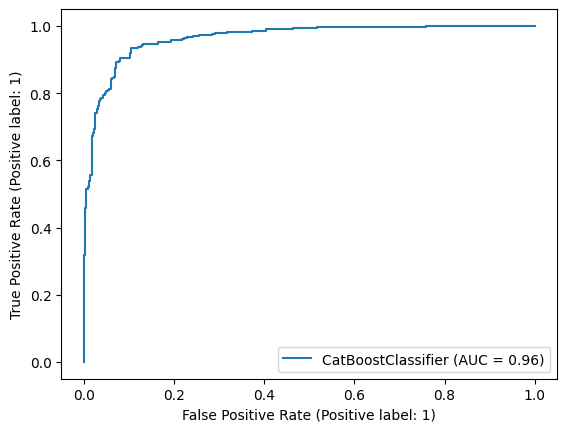

In [30]:
RocCurveDisplay.from_estimator(modelo_cb, X, y)